In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from helpers import visualize_data, collect_results

In [2]:
pd.options.display.max_rows = None

In [3]:
# change to True to run the experiments with the sex labels.
run_experiment_with_sex_labels = False

# Read data

In [4]:
# read manually annotated (ground truth) microexpressions
df_gt = pd.read_csv('data/All_Gestures_Deceptive and Truthful.csv')
display(df_gt)

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class,subject,sex
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,deceptive,1,F
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,deceptive,1,F
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,deceptive,1,F
5,trial_lie_006.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,1,F
6,trial_lie_007.mp4,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
7,trial_lie_008.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,deceptive,2,F
8,trial_lie_009.mp4,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,deceptive,2,F
9,trial_lie_010.mp4,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,deceptive,2,F


In [5]:
# take ground truth microexpression features
x = df_gt.loc[:, 'OtherGestures' : 'upHands'].to_numpy()

x.shape

(121, 39)

In [6]:
# take lie labels
y_lie = df_gt['class'].eq('deceptive').mul(1).to_numpy()

# take sex labels
y_sex = df_gt['sex'].eq('F').mul(1).to_numpy()

In [7]:
# number of truths/lies
print('Lie:', len(y_lie[y_lie == 1]))
print('Truth:', len(y_lie[y_lie == 0]), end='\n\n')

# number of males/females
print('Females:', len(y_sex[y_sex == 1]))
print('Males:', len(y_sex[y_sex == 0]))

Lie: 61
Truth: 60

Females: 76
Males: 45


In [8]:
# take subjects
subjects = df_gt['subject'].to_numpy()

# Visualize

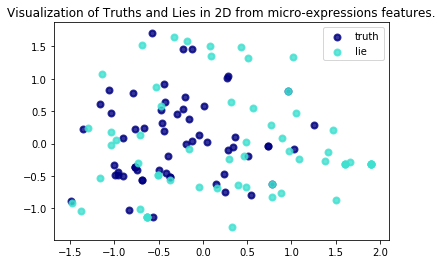

In [9]:
visualize_data(x, y_lie, 'micro-expressions')

# Perform experiments

#### Note that more values for hyperparameters were tried than are shown below.

In [ ]:
# L-SVM
lsvm_hyperparameter_map = {}
for C in [1e-3, 1e-2, 1e-1, 5e-1, 2]: 
    clf = SVC(C=C, kernel='linear', probability=True)
    collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, C, clf, lsvm_hyperparameter_map, iterations=25)   

In [ ]:
# Logistic Regression
lr_hyperparameter_map = {}
for C in [0.001, 0.01, 0.1, 0.5, 1, 3, 10]: 
    clf = LogisticRegression(C=C, max_iter=200)
    collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, C, clf, lr_hyperparameter_map, iterations=25)   

In [ ]:
# KNN
knn_hyperparameter_map = {}
for K in [1, 3, 5, 7, 10, 15]:
    clf = KNeighborsClassifier(K)
    collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, K, clf, knn_hyperparameter_map, iterations=25)   

In [ ]:
# K-SVM
ksvm_hyperparameter_map = {}
for C in [0.5, 1, 3, 10]:
    for gamma in [0.01, 0.05, 0.3, 1, 5]:
        clf = SVC(C=C, gamma=gamma, probability=True)
        collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, (C, gamma), 
                        clf, ksvm_hyperparameter_map, iterations=5)   

In [ ]:
# Random Forest
rf_hyperparameter_map = {}
for max_depth in [6, 10, 15, 22, 40]:
    for max_features in ['sqrt', 'log2']:
        clf = RandomForestClassifier(n_estimators=1000, max_depth=max_depth, max_features=max_features)
        collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, (max_depth, max_features), 
                        clf, rf_hyperparameter_map, iterations=5)   

In [ ]:
# Adaboost
ab_hyperparameter_map = {}
for n_estimators in [10, 50, 100, 250, 500, 1000]:
    for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, (n_estimators, learning_rate), 
                        clf, ab_hyperparameter_map, iterations=5)   

In [ ]:
# MLP
mlp_hyperparameter_map = {}
for hidden_layer_size in [3, 7, 15, 30, 50]:
    for alpha in [1e-5, 1e-3, 1e-1, 1, 1e1]:
        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, alpha=alpha, max_iter=10000)
        collect_results(x, y_lie, y_sex, subjects, run_experiment_with_sex_labels, (hidden_layer_size, alpha), 
                        clf, mlp_hyperparameter_map, iterations=5)   